<a href="https://colab.research.google.com/github/mondalsnehankur/Quantum-Mechanics-Simulation_Python/blob/main/Potential_Well_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider a square-shaped finite potential well of depth Vo and width L. The allowed energies of the even-numbered states can be found by solving tan eta = sqrt((xi_{0} / eta) ^ 2 - 1)

and the allowed energies of the odd-numbered states can be found by solving - cot eta = sqrt((xi_{0} / eta) ^ 2 - 1)

where n = (L/2)√(2m/ħ²)E, and ξο = (L/2)√(2m/ħ²)Vo

If for a certain system xi_{0} = 5 calculate the η values corresponding to three lowest bound states.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def bisection(func, a, b, tolerance=1e-6):
    if func(a) * func(b) >= 0:
        return None  # No root in the interval

    while (b - a) / 2 > tolerance:
        c = (a + b) / 2
        if func(c) == 0:
            return c
        elif func(a) * func(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

In [ ]:
# Define the equations for even and odd states
def even_state_equation(eta):
    return np.tan(eta) - np.sqrt((xi0 / eta)**2 - 1)

def odd_state_equation(eta):
    return -1/np.tan(eta) - np.sqrt((xi0 / eta)**2 - 1)

In [ ]:
xi0 = 5 # Given value of ξ₀

# Generate eta values
eta_values = np.linspace(0.01, xi0, 1000)

In [ ]:
# Find roots for even states
even_roots = []
for i in range(len(eta_values) - 1):
    if even_state_equation(eta_values[i]) * even_state_equation(eta_values[i + 1]) < 0:
        root = bisection(even_state_equation, eta_values[i], eta_values[i + 1])
        even_roots.append(root)

# Find roots for odd states
odd_roots = []
for i in range(len(eta_values) - 1):
    if odd_state_equation(eta_values[i]) * odd_state_equation(eta_values[i + 1]) < 0:
        root = bisection(odd_state_equation, eta_values[i], eta_values[i + 1])
        odd_roots.append(root)

In [ ]:
# Combine and sort roots
all_roots = sorted(even_roots + odd_roots)

# Print the three lowest roots
print("The three lowest bound states are:")
for i in range(min(3, len(all_roots))):
    print(f"eta_{i+1} = {all_roots[i]:.4f}")

The three lowest bound states are:
eta_1 = 1.3064
eta_2 = 1.5708
eta_3 = 2.5957


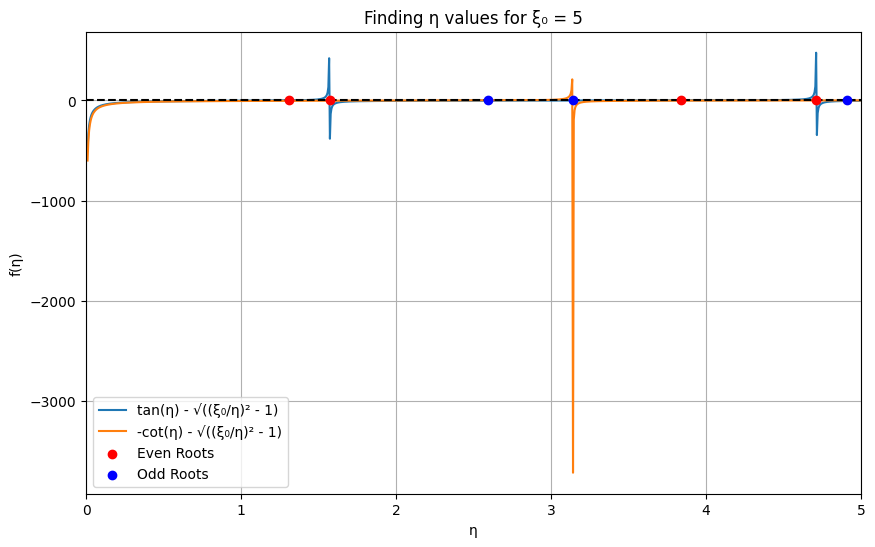

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(eta_values, even_state_equation(eta_values), label='tan(η) - √((ξ₀/η)² - 1)')
plt.plot(eta_values, odd_state_equation(eta_values), label='-cot(η) - √((ξ₀/η)² - 1)')
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
plt.scatter(even_roots, [0]*len(even_roots), color='red', label='Even Roots', zorder=5)
plt.scatter(odd_roots, [0]*len(odd_roots), color='blue', label='Odd Roots', zorder=5)

plt.xlabel('η')
plt.ylabel('f(η)')
plt.title('Finding η values for ξ₀ = 5')
plt.xlim(0, xi0)
plt.legend()
plt.grid(True)
plt.show()